In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

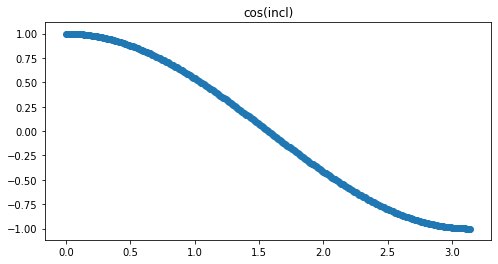

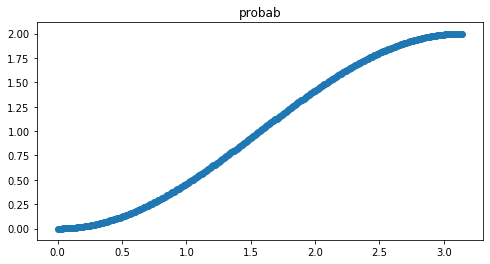

0.10120595370083296


In [3]:
inc = (np.arange(0,np.pi,0.01))
#print(inc)

cosi = np.cos(inc)
fig= plt.figure(figsize=(8,4))
plt.title('cos(incl)')
plt.scatter(inc,cosi)
plt.show()
prob=1-cosi
fig= plt.figure(figsize=(8,4))
plt.title('probab')
plt.scatter(inc,prob)
plt.show()
probat26deg=1-np.cos(26*2*np.pi/360)
print(probat26deg)

2.9950160248184416
length of mp 10000


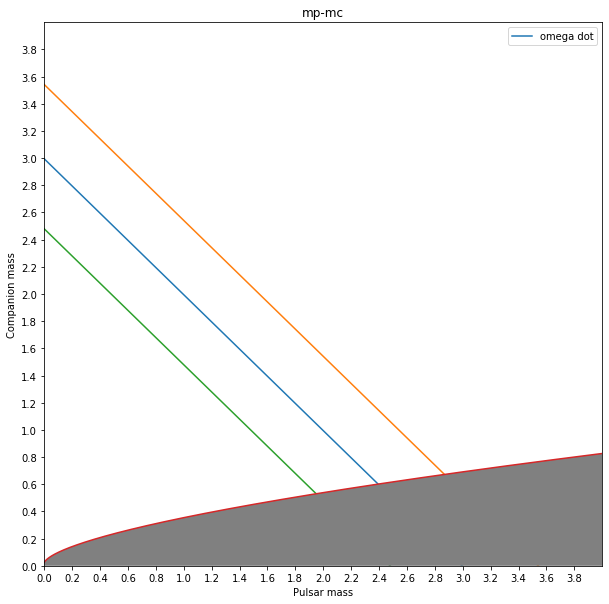

/home/tasha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: RuntimeWarning: divide by zero encountered in double_scalars
/home/tasha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:115: RuntimeWarning: divide by zero encountered in double_scalars
/home/tasha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: divide by zero encountered in double_scalars


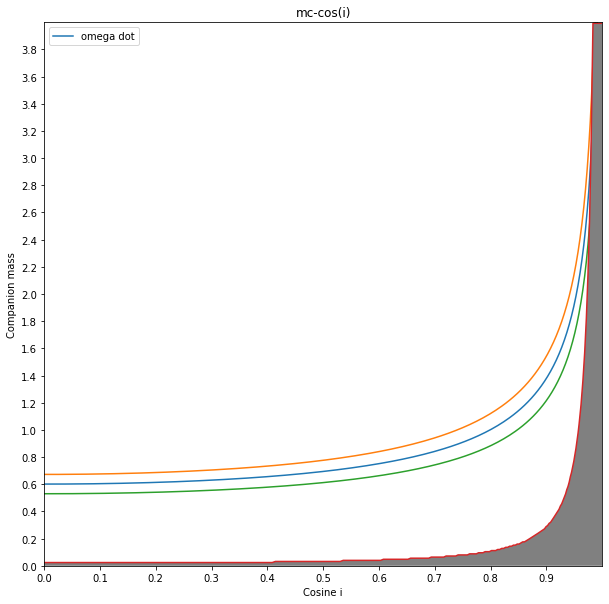

In [6]:
inc_rad = (np.arange(0,np.pi,np.pi/10000))
mp=np.arange(0.00001,4,(4-0.00001)/10000)
x=12.782038540
e=0.0065856045
omdot_degperyear=0.0094945
omdot_sig = 0.0011228
omdot_degperyear_sig_plus = omdot_degperyear + omdot_sig
omdot_degperyear_sig_minus = omdot_degperyear - omdot_sig
omdot_rad_s=omdot_degperyear*2*np.pi/(360*365*24*60*60)
omdot_rad_s_plus=omdot_degperyear_sig_plus*2*np.pi/(360*365*24*60*60)
omdot_rad_s_minus=omdot_degperyear_sig_minus*2*np.pi/(360*365*24*60*60)
T0=4.925490947e-6
Pb=9.61975330288715*24*60*60

Mtot= (omdot_rad_s*(1-(e*e))*(Pb/(2*np.pi))**(5./3)/(3*T0**(2./3)))**(3./2)

Mtot_plus= (omdot_rad_s_plus*(1-(e*e))*(Pb/(2*np.pi))**(5./3)/(3*T0**(2./3)))**(3./2)

Mtot_minus= (omdot_rad_s_minus*(1-(e*e))*(Pb/(2*np.pi))**(5./3)/(3*T0**(2./3)))**(3./2)

print(Mtot)

#mc= np.arange(0,3,0.0001)

fig = plt.figure(figsize=(10,10))

mc_mtot=Mtot-mp

mc_mtot_plus = Mtot_plus - mp

mc_mtot_minus = Mtot_minus - mp

#mc_min = 4*(np.pi**2)*x**3*Mtot**2/(T0*Pb**2)

#print(mc_min)
plt.title("mp-mc")
plt.xlabel("Pulsar mass")
plt.ylabel("Companion mass")
plt.xlim(0,4)
plt.ylim(0,4)
plt.xticks(np.arange(0, 4, step=0.2))
plt.yticks(np.arange(0, 4, step=0.2))
plt.plot(mp,mc_mtot,zorder=1,label='omega dot')
plt.plot(mp,mc_mtot_plus,zorder=1)
plt.plot(mp,mc_mtot_minus,zorder=1)
plt.legend()

#mc_inc=1/(np.sin(inc))*(4*np.pi**2*x**3*Mtot**2/(T0*Pb**2))**1/3

#if mc_inc < 0 or mc_inc > 3:
#    mc_inc = math.nan
#print(mc_inc)
print("length of mp", len(mp))
#print("length of mc_inc", len(mc_inc))
#plt.scatter(mp,mc_inc)


def mc(m,x,Pb,incl_deg):
    mc_min=[]
    p0=T0*Pb**2*np.sin(incl_deg*2*np.pi/360)**3
    p1=-4*np.pi**2*x**3
    p2=-8*np.pi**2*x**3*m
    p3=-4*np.pi**2*x**3*m**2
    coeff = [p0,p1,p2,p3]
    mc_mi = np.real(np.roots(coeff))
    mc_min = (mc_mi[mc_mi>0])
    #print(len(mc_min))
    if len(mc_min)==0:
        return np.NaN
    else:
        return mc_min[0]
    
def mc4negativemp(mc,x,Pb,incl_rad):
    p0=4*np.pi**2*x**3
    p1=8*np.pi**2*x**3*mc
    p2=(4*np.pi**2*x**3*mc**2)-(np.sin(incl_rad)**3*mc**3*T0*Pb**2)
    coeff = [p0,p1,p2]
    mp_mi = np.real(np.roots(coeff))
    check = any(mp_mii > 0 for mp_mii in mp_mi)
    #print(check)
    if check == False:
        #print("Negative value of mp")
        #print("Mp, i, Mc %d %d %d",(mp_mi,np.cos(incl_rad),mc))
        return mc
    else:
        #print(mp_mi)
        c=0
        return c
    #print("mp_min", mp_mi)
mc_minimum=[]
for m in mp:
    mc_minimum.append(mc(m,x,Pb,90))

deg=[5,10,30,50,80]
#for d in deg:
    #mc_minimum_inc=[]
    #for m in mp:
    #    mc_minimum_inc.append(mc_min(m,x,Pb,d))
    #plt.plot(mp,mc_minimum_inc)
plt.plot(mp,mc_minimum)
plt.fill_between(mp, 0, mc_minimum,facecolor='grey',zorder=2)
plt.show()

cosi=np.cos(inc_rad)

mc_range=np.arange(0.0,4,(4)/500)
min_allowed_mc=[]
mc_sini=[]
mc_sini_plus=[]
mc_sini_minus=[]
inc_radnew = (np.arange(0,np.pi,np.pi/500))
for i in inc_radnew:
    mc_notallowed=[]
    mc_sini.append((4*np.pi**2*x**3*Mtot**2/(T0*Pb**2))**(1./3)/(np.sin(i)))
    mc_sini_plus.append((4*np.pi**2*x**3*Mtot_plus**2/(T0*Pb**2))**(1./3)/(np.sin(i)))
    mc_sini_minus.append((4*np.pi**2*x**3*Mtot_minus**2/(T0*Pb**2))**(1./3)/(np.sin(i)))
    for m in mc_range:
        mc_notallowed.append(mc4negativemp(m,x,Pb,i))
    
    min_allowed_mc.append(np.max(mc_notallowed))
    #print("max_allowed_mc", (np.max(np.isfinite(mc_notallowed))))
    #print("cosine of inclination", np.cos(i))
    #print(mc_notallowed)
    #min_mp
fig = plt.figure(figsize=(10,10))
plt.title("mc-cos(i)")
plt.xlabel("Cosine i")
plt.ylabel("Companion mass")
plt.xlim(0,1)
plt.ylim(0,4)
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 4, step=0.2))
plt.plot(np.cos(inc_radnew),mc_sini,zorder=1,label='omega dot')
plt.plot(np.cos(inc_radnew),mc_sini_plus,zorder=1)
plt.plot(np.cos(inc_radnew),mc_sini_minus,zorder=1)
plt.plot(np.cos(inc_radnew),min_allowed_mc,zorder=2)
plt.fill_between(np.cos(inc_radnew), 0, min_allowed_mc,facecolor='grey',zorder=2)
plt.legend()


plt.show()
#plt.savefig('mc-cosi_ter5an.png')
